<div style="color:Navy"> 

<div style="text-align:center"> 

***
# <u>TP2:</u>
# Manipulation de luminance et Histogrammes  
    
<p style="text-align: center; color:gray"><i>@Author:</i> Marc-Aurèle Rivière</p>

***
</div> 

<u>**Plan:**</u>

1. [**Quelques rappels**](#1): histogrammes, luminance, contraste et exposition
2. [**Opérations linéaires sur la luminance**](#2): inversions, ajout/retrait, etirement, egalisation, egalisation adaptative
3. [**Opérations non-linéaires sur la luminance**](#3): transformée logarithmique, transformée gamma
    
</div>

# <span style="color: green;text-decoration: underline" id="1">I. Quelques rappels</span>
***

Nous abordons ici les techniques de traitement d'images basées sur la modification d'histogrammes. 
Ces méthodes font partie de la classe des traitements dits **ponctuels** (*pixel-wise*): la valeur de chaque pixel est corrigée, et ce indépendamment des autres pixels.

La manipulation d'histogrammes est un outil très important en traitement d'images, permettant d'ajuster la dynamique des niveaux de gris ou des couleurs dans une image afin de la rendre plus agréable visuellement. 

## <span style="color: DodgerBlue;text-decoration: underline">I.1 Histogrammes</span>
***

**L'histogramme d'une image numérique** est une courbe statistique représentant la répartition de ses pixels selon leur intensité. Pour une image en noir et blanc, il indique en abscisse le niveau de gris (entier entre 0 et 255) et en ordonnée, le nombre de pixels ayant cette valeur.

Lorsque l'histogramme est normalisé (somme à 1), il indique en ordonnée la probabilité $p_i$ de trouver un pixel de niveau de gris $i$ dans l'image. L'histogramme normalisé peut être interprété comme une **distribution de probabilité**. L'intensité d'un pixel est alors vue comme une variable aléatoire discrète.


Un **histogramme cumulé normalisé** calcule le pourcentage de pixels ayant une valeur inférieure à un niveau de gris donné.



## <span style="color: DodgerBlue;text-decoration: underline">I.2 Luminance</span>
***

Quelques notions et mots de vocabulaire:

- La **luminance** (ou intensité) est une mesure physique qui fait référence à la quantité de lumière absolue émise par un objet (par unité de surface).
- La **luminosité** est une mesure perceptive qui fait référence à la brillance perçue d'un objet par un observateur humain.
- **Tons clairs et foncés** font référence à des couleurs ayant respectivement une luminance élevée et faible.

Illustration:  

![Histogramme](img/Illustrations/Histo.png)

Cette distinction est nécessaire car la luminosité perçue dépends d'autres paramètres de la scène que l'objet lui-même.

***
#### **[Parenthèse]**

Cela se remarque dans certaines illusions d'optique comme:  
<img src="img/Illustrations/optical.png" width="400">

Notre cerveau fait constamment des hypothèses sur les propriétés de notre monde, et ces a priori viennent influencer notre perception du monde.  
Ici en l'occurence, ces a priori influencent la luminosité perçue alors que les deux dalles ont la même teinte et la même luminance : nos yeux reçoivent la même quantité de lumière des deux, mais le dessin est fait de de sorte à donner l'illusion que B est dans une zone d'ombre. Or, pour votre cerveau, la seule manière qu'un objet B dans une zone d'ombre soit aussi brillant qu'un objet A hors de l'ombre est que B doit naturellement être plus clair que A pour que, malgré l'ombre, il brille autant. Et il corrige l'information perçue selon cette hypothèse, résultant en l'illusion observée: A et B ont des couleurs différentes.

Ce genre d'hypothèses représentent un avantage évolutif et se révèleront être généralement utiles pour formuler des jugements perceptifs corrects rapidement, dans le monde réel. Certaines sont innées, d'autres apprises par l'expérience, mais elles sont omni-présentes dans notre perception du monde. Elles interviennent de manière inconsciente pour optimiser notre prise de décision. Cependant, ce genre d'heuristiques perceptives nous induisent parfois en erreur, notamment lorsqu'elles sont mises à mal intentionnellement par des illusions d'optiques faites spécifiquement pour les mettre à défaut. C'est à ce moment là qu'on les remarque, et qu'on se rend compte de leur nature irrépressible: on à beau savoir que l'on est trompés, on ne peut rien y changer.

> *Percevoir est une bataille constante entre ce que l'on voit et ce que l'on s'attends à voir.*

#### **[Fin de la parenthèse]**
***
  
Pour une image en **niveaux de gris**, l'information de luminance est directement donnée par la valeur de chaque pixel, qui représente une quantité de lumière transmise (on parle également d'intensité).

Pour une image **RGB**, l'information de luminance est "répartie" dans les trois canaux de couleur, et doit être extraire pour que l'image RGB soit convertie en image de niveaux de gris : on parle de séparer les valeurs de **luminance** et de **chrominance**. Les informations de luminance et chrominance (qui représente l'information de couleur pure, sans luminance) sont mélangées dans les canaux RGB, mais peuvent être séparées par des filtres spécifiques.  
<img src="img/Illustrations/tri.png" width="600">

Par exemple, la fonction `convert("L")` de Pillow converti une image couleur en calculant la valeur de luminance (L) de chaque pixel par la fonction suivante : `L = R * 0.299 + G * 0.587 + B * 0.114`

**Remarque:** L'information de luminance de chaque pixel va influencer à quel point le pixel (de l'écran) qui affiche ce pixel (de l'image) sera illuminé, ce qui va influencer à son tour la luminosité perçue par la personne devant l'écran.

## <span style="color: DodgerBlue;text-decoration: underline">I.3 Contraste</span>
***

Le **contraste** est une propriété intrinsèque d'une image qui quantifie la différence de luminance entre les parties claires et sombres. Cette caractéristique nous donne une idée sur la dispersion/répartition de la luminance au sein de l'image : plus les valeurs de luminance des pixels de l'image se ressemblent, plus faible sera le contraste. A contrario, plus la luminance varie dans l'image, plus le contraste sera élevé.

En général, une image peu contrastée est terne, tandis qu'une image trop contrastée est visuellement "agressive". Dans les deux cas, l'image manque de clarté car certains de ses détails seront peu, voire pas du tout, visibles.

**Remarque:** C'est un indice de dispersion (de la distribution de la luminance des pixels --> l'histogramme), au même titre que l'écart type ou la variance indiquent la dispersion des valeurs autour de la moyenne dans une distribution.

#### *Cas particuliers :*
- Si l'ensemble des pixels ont la même valeur, le contraste sera nul.
- Une image constituée uniquement de pixels noirs et blanc aura un contraste maximal.

#### Au niveau de l'histogramme, le contraste se traduira par:
- Un histogramme (de luminance) peu dispersé (centré autour de la valeur moyenne de luminance) pour les images à faible contraste: pas de grandes variations dans la luminance.
- Un histogramme plus étendu / dispersé pour les images à fort contraste.   

 <img src="img/Illustrations/Hist5.png">
 
 
**Ajuster le contraste** d'une image à pour but d'harmoniser la distribution des niveaux de gris de l'image, de sorte que chaque niveau de l'histogramme (`[0, 255]`) contienne idéalement le même nombre de pixels. Les méthodes d'ajustement de contraste vont donc modifier la valeur de luminance des pixels de l'image de sorte à redistribuer la luminance de manière plus équitable entre les pixels.

Par exemple, accentuer les différences de luminance en rendant les pixels sombres plus sombres et les pixels clairs plus clairs augmentera le contraste.

Il existe plusieurs méthodes pour accomplir cet objectif, linéaires ou non-linéaires, appartenant toutes à la catégorie générale de ***histogram remapping***.

## <span style="color: DodgerBlue;text-decoration: underline">I.4 Niveau d'exposition</span>
***

Une image **sur-exposée** et **sous-exposée** auront toutes deux un faible contraste:
- La majeure partie des pixels auront une valeur de luminance élevée pour les images sur-exposées (*high-key*), donc la luminance moyenne sera élevée, et le contraste sera faible.
- La majeure partie des pixels auront une valeur de luminance faible pour les images sous-exposées (*low-key*), donc la luminance moyenne sera faible, et le contraste sera faible.

<u>Faible contraste:</u>   
<img src="img/Illustrations/cray_low.jpg" width="340">
<img src="img/Illustrations/liz_low.jpg" width="300">

<u>Fort contraste:</u>  
<img src="img/Illustrations/cray_high.jpg" width="340">
<img src="img/Illustrations/liz_high.jpg" width="300">

# <span style="color: green;text-decoration: underline" id="2">II. Opérations linéaires sur la luminance</span>
***

## <span style="color: DodgerBlue;text-decoration: underline">II.1 Inversion</span>
***

Une **image négative** est une image dont les couleurs ont été inversées par rapport à l'originale : 
- Le rouge devient cyan, le vert devient magenta, le bleu devient jaune et inversement.
- Les régions sombres deviennent claires, le noir devient blanc.  

Au niveau de la luminance, chaque valeur est remplacée par son inverse: $I' = 255 - I$

**Exemples:**  
<img src="img/Illustrations/neg.jpg" height="400">

**Remarque:** L'histogramme d'une image inversée sera l'inverse de celui de l'image d'origine.

In [2]:
# Code commun

from PIL import Image
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
%matplotlib inline

# Affichons l'image d'origine, son inverse, et leurs histogrammes
def affichage_inverse(img, imgInv):
    fig = plt.figure(figsize=(12, 12))

    ax = fig.add_subplot(2,2,1)
    plt.imshow(img, "gray")
    ax.set_title("Image")
    ax = fig.add_subplot(2,2,2)
    plt.hist(img.ravel(), 256, [0,256])
    ax.set_title("Histogramme de l'image")

    ax = fig.add_subplot(2,2,3)
    plt.imshow(imgInv, "gray")
    ax.set_title("Image inversée")
    ax = fig.add_subplot(2,2,4)
    plt.hist(imgInv.ravel(), 256, [0,256])
    ax.set_title("Histogramme de l'image inversée")

#### Inversion d'images par opérations matricielles:

Vous pouvez inverser une image (au format matriciel) de deux manières :
```python
imgInv = 255 - img
imgInv = ~img
```

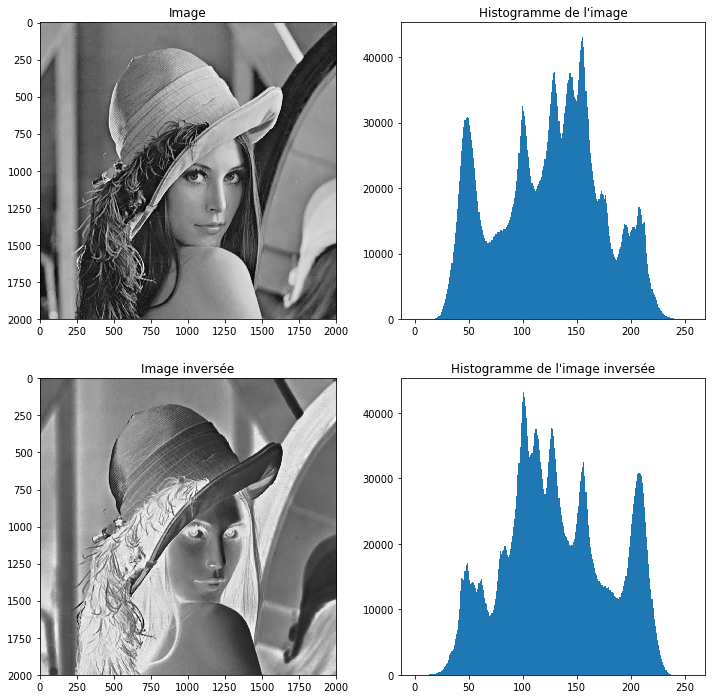

In [3]:
img = np.array(Image.open('img/lena.jpg').convert("L"))

# On inverse l'image
imgInv = ~img

affichage_inverse(img, imgInv)

#### Inversion d'image via des méthodes spécifiques (Pillow):

##### En niveaux de gris:

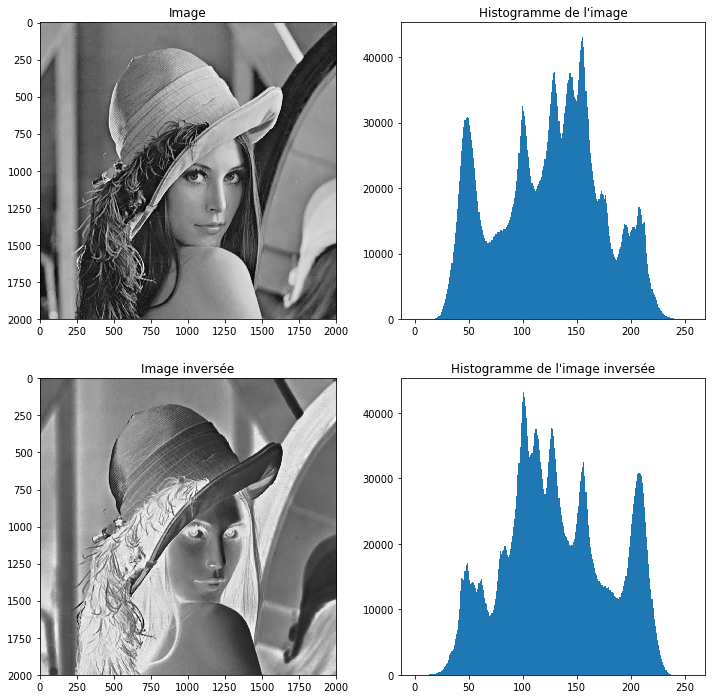

In [0]:
img = Image.open('img/lena.jpg').convert("L")

# On inverse l'image
imgInv = ImageOps.invert(img)

affichage_inverse(np.array(img), np.array(imgInv))

##### En couleur:

### <span style="color:crimson">**[Exercice]** A vous de jouer:</span>
***
<div style="color:DarkSlateBlue">  
 
1. **En utilisant la même méthode de Pillow, chargez une image de votre choix en couleur et inversez-là.**
    
    
2. **Affichez l'image d'origine et son histogramme, ainsi que l'image modifiée et son histogramme.**
    
    
3. **Séparez les canaux de l'image, inversez-les et refusionez-les.**

</div>

In [0]:
# > Emplacement exercice <



## <span style="color: DodgerBlue;text-decoration: underline">II.2 Ajout / retrait (constantes)</span>
***

Ajouter (ou retirer) une quantité constante de luminance à l'image permet de faire varier son niveau d'exposition (mais pas son contraste, qui est défini comme l'écart / la dispersion des valeurs de luminance dans l'image).

Les nouvelles valeurs de luminance seront définies par : $I' = I + c$

### II.2.a Par manipulation direct de la matrice

In [0]:
# Pour cette section, nous allons utiliser Pillow (PIL) et son module Image pour lire notre image

from PIL import Image, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Importons notre image en niveaux de gris avec le module "Image" de "PIL"
img = Image.open('img/lena.jpg').convert('L')
# Convertissons la en array (matrice) Python
img = np.array(img)

# Définissons une fonction pour regrouper le code permettant d'afficher une image et son histogramme côte-à-côte:
def image_et_histo(img, cmap="gray"):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1,2,1)
    plt.imshow(img, cmap)
    ax.set_title("Image")
    ax = fig.add_subplot(1,2,2)
    plt.hist(np.array(img).ravel(), 256, [0,256])
    ax.set_title("Histogramme")

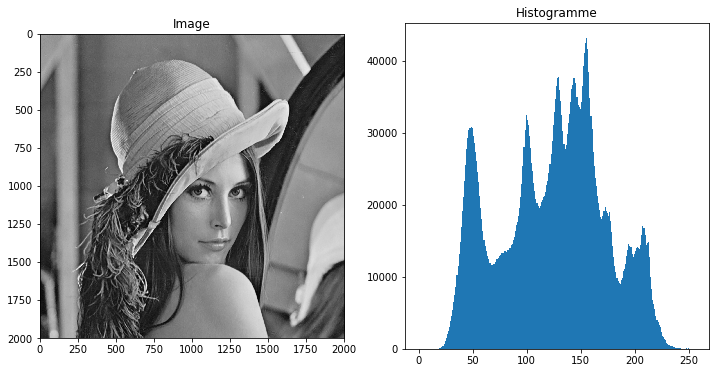

In [0]:
# Affichons l'image chargée et son histogramme:
image_et_histo(img)

##### Passons à la manipulation:

Pour modifier la luminance d'une image en **niveaux de gris** stockée sous format de matrice (```np.array```), il suffit de modifier la valeur de chaque pixel de la matrice.  
On peut alors ajouter ou retirer une certaine valeur à tous les pixels de l'image, sans discrimination sur leur valeur initiale.

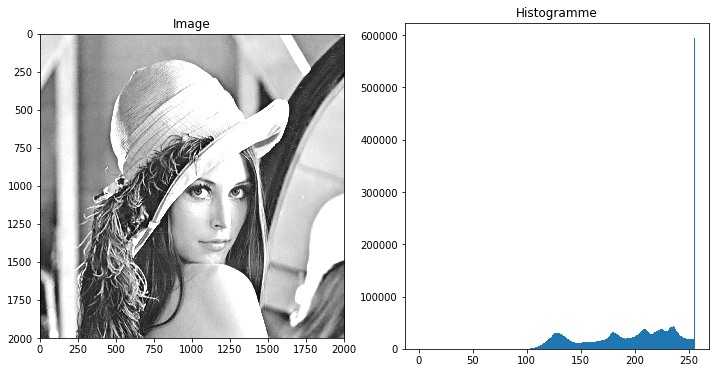

In [0]:
# Ajoutons 80 à tous les pixels de l'image, en vérifiant que la valeur ne va pas excéder les 255
imgL = np.where((255 - img) >= 80, img + 80, 255)

image_et_histo(imgL, "gray")

##### Observations:

**Sur l'image:** 
- Notre image a bien gagné en luminance, mais on a aussi perdu de nombreux détails dans les zones les plus claires.  
- En effet les pixels de l’image d’origine qui avaient une valeur de luminance de 175 ou plus se retrouvent avec une valeur supérieure à 255 après l'ajout de 80.  
- On perd donc en détails dans les hautes luminances à cause de cette opération. On parle d’écrêtage du signal (*clipping*) : les nuances de luminance qui existaient entre 175 et 255 sont perdues à jamais (perte d'information non réversible).

**Sur l'histogramme**: 
- On remarque que plus aucun pixel ne semble avoir une valeur < 80.
- On voit également qu'il y a une majorité de pixels ayant une valeur de 255 (à cause de l'écrêtage du signal mentionné au dessus).
  * C'est à cause de la mise à l'échelle de l'histogramme qu'il apparait applatit : il y a énormément de pixels avec la valeur 255, du coup les autres quantités semblent dérisoires à côté. Pour remédier à ça, on peut retirer la valeur 255 de l'histogramme artificiellement:

Text(0.5,1,'Histogramme après le +80')

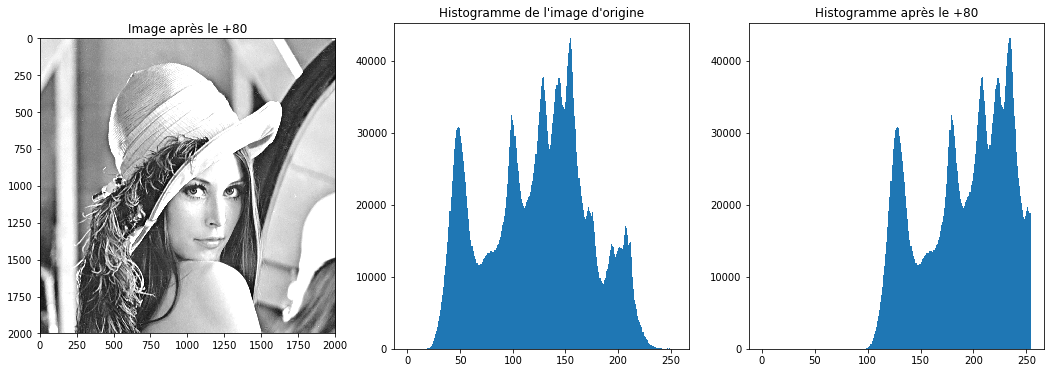

In [0]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(1,3,1)
plt.imshow(imgL, "gray")
ax.set_title("Image après le +80")
ax = fig.add_subplot(1,3,2)
plt.hist(np.array(img).ravel(), 256, [0,255])
ax.set_title("Histogramme de l'image d'origine")
ax = fig.add_subplot(1,3,3)
plt.hist(np.array(imgL).ravel(), 255, [0,254])
ax.set_title("Histogramme après le +80")

Ici, on voit mieux qui l'histogramme à bien été "poussé" vers la droite (vers les valeurs élevées de luminance), et que tous les pixels avec une valeur de 175 et plus dans l'histogramme d'origine (avant la modification de luminance) ont disparus : ils valent tous 255 maintenant, et ne sont plus affichés sur l'histogramme.  

**Remarque:** En photographie, une image avec un histogramme trop décalé vers là droite est dite sur-exposée : un déséquilibre de contraste du faite que trop de lumière à été captée et peu de détails sont disponibles dans les tons sombres.

Text(0.5,1,'Histogramme après le -80')

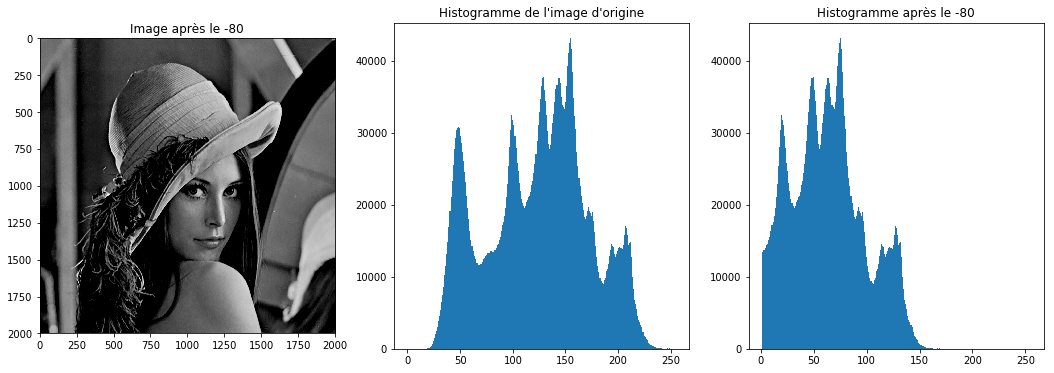

In [0]:
# Retirons 80 à tous les pixels de l'image, en vérifiant que la valeur ne va pas passer sous 0
imgD = np.where(img >= 80, img - 80, 0)

# Affichons le résultat
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(1,3,1)
plt.imshow(imgD, "gray")
ax.set_title("Image après le -80")
ax = fig.add_subplot(1,3,2)
plt.hist(np.array(img).ravel(), 256, [0,255])
ax.set_title("Histogramme de l'image d'origine")
ax = fig.add_subplot(1,3,3)
plt.hist(np.array(imgD).ravel(), 255, [1,255])
ax.set_title("Histogramme après le -80")

Même observations qu'avant, sauf que cette fois-ci l'histogramme à été poussé vers la gauche (valeurs de faible luminance), et que plus aucun pixel n'a de valeur supérieure à 175.

On parle alors d'image sous-exposée.

### II.2.b Via Pillow :

Pillow fournit un ensemble de méthodes permettant de manipuler une image aisément : le module ```ImageEnhancer```  
Parmi l'ensemble des méthodes de ce [module](https://pillow.readthedocs.io/en/3.1.x/reference/ImageEnhance.html#PIL.ImageEnhance.Brightness), il y à la classe ```Brightness``` qui permet de manipuler la luminance d'une image chargée avec Pillow.

Elle s'utilise de la manière suivante:
```Python
# On initialise "l'enhancer"
enhancer = ImageEnhance.Brightness(img)
# On applique une augmentation de 30% de luminance
img2 = enhancer.enhance(1.3)
```

##### Sur une image en niveaux de gris :

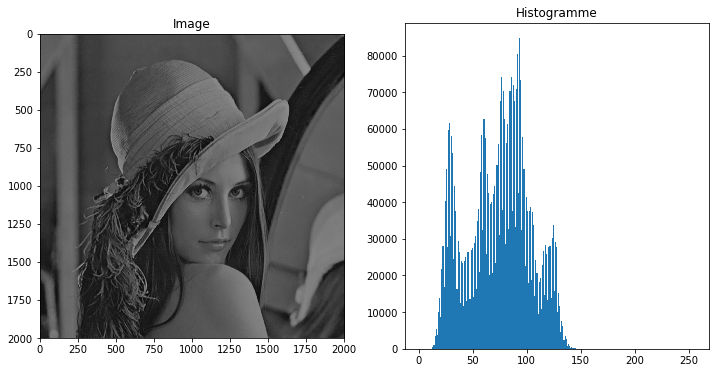

In [0]:
# Exemple en niveaux de gris
img = Image.open('img/lena.jpg').convert('L')

# On créé "l'enhancer" et on applique une réduction de 40% de luminance
img2 = ImageEnhance.Brightness(img).enhance(0.6)

image_et_histo(img2, "gray")

#### Sur une image couleur:

Pillow propose une méthode (```ImageEnhance```) pour modifier la luminance d'une image couleur sans avoir à extraire l'information de luminance des valeurs RGB.

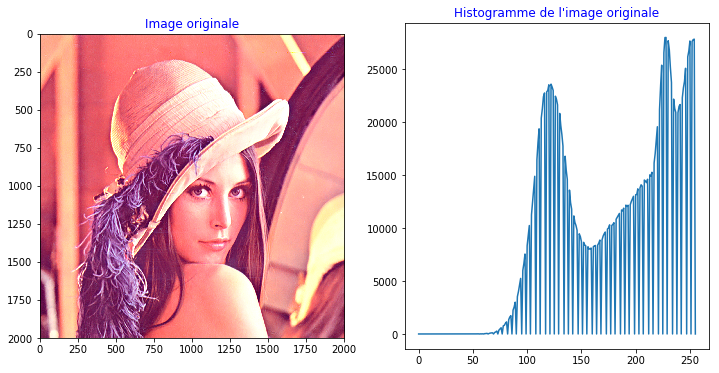

In [0]:
import cv2
from PIL import Image, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = Image.open('img/lena.jpg')

# On créé "l'enhancer" et on applique une augmentation de 30% de luminosité
img2 = ImageEnhance.Brightness(img).enhance(1.3)

# Fonction d'affichage utilisant OpenCV pour calculer l'histogramme de l'image
def image_et_histo2(img):
    fig = plt.figure(figsize=(12, 6))
    
    hist = cv2.calcHist([np.array(img)],[0],None,[256],[0,255])
    
    plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title("Image originale", color='b')
    plt.subplot(122), plt.plot(hist), plt.title("Histogramme de l'image originale", color='b')
    plt.show()

image_et_histo2(img2)

### <span style="color:crimson">**[Exercice]** A vous de jouer:</span>
***
<div style="color:DarkSlateBlue">  
 
1. **Implémentez une fonction permettant d'ajouter une valeur constante de luminance à une image couleur.**

<u>Astuce</u>: passez l'image couleur dans un espace colorimétrique permettant de modifier sa luminance globale sans avoir à séparer les canaux.
    
</div>

In [0]:
# > Emplacement exercice <



## <span style="color: DodgerBlue;text-decoration: underline">II.3 Etirement</span>
***

**L'étirement de contraste**, aussi appelé **normalisation d'image**, est une **méthode d'amélioration d'image ponctuelle** dans le domaine spatial, permettant de corriger les défauts d’exposition d'une image (et donc son contraste) en **étirant son histogramme** pour étendre les valeurs de luminance (intensité) à tout l'intervalle disponible (généralement `[0,255]`).

C'est une **opération linéaire de changement à l'échelle** (*re-scaling*), où la valeur de chaque pixel est remplacée par :   

\begin{equation*}
I′(x,y) = (I'_\max - I'_\min) * \dfrac{(I(x,y) − I_\min)}{(I_\max − I_\min)} + I'_\min
\end{equation*}

avec :
* $I(x,y)$ et $I′(x,y)$ les intensités du pixel de coordonnées (x,y) respectivement dans l'image mal exposée et la nouvelle image.
* $I'_\min$ et $I'_\max$ les nouvelles intensitées minimales et maximales choisiées (généralement 0 et 255, respectivement)

<img src="https://i.stack.imgur.com/9gIw6.png" width="400">

<img src="https://i.stack.imgur.com/mOoAC.png">

In [0]:
### Code utile pour cette section

import cv2
import numpy as np
from PIL import ImageOps, Image

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Affichons l'image originale, modifiée, et leurs histogrames (*smoothed* via un KDE - Kernel Density Estimation)
def affichage_2x2(img1, img2):
    fig = plt.figure(figsize=(18, 12))

    ax1 = plt.subplot(221)
    ax1.imshow(img1, "gray")
    ax1.set_title("Image originale")
    ax2 = plt.subplot(222)
    sns.kdeplot(np.array(img1).ravel(), shade=True, kernel="gau", bw="scott", clip=[0,255], cut=0)
    ax2.set_title("Histogramme (KDE) de l'original")
    
    ax3 = plt.subplot(223)
    ax3.imshow(img2, "gray")
    ax3.set_title("Image ajustée")
    ax4 = plt.subplot(224, sharex=ax2, sharey=ax2)
    sns.kdeplot(np.array(img2).ravel(), shade=True, kernel="gau", bw="scott", clip=[0,255], cut=0)
    ax4.set_title("Histogramme (KDE) de l'image ajustée")
    plt.show()

#### Exemple avec `ImageOps.autocontrast` et un widdget interactif de selection d'image :

In [2]:
@interact
def autocontrast(image=[f for f in os.listdir("img/") if os.path.isfile(os.path.join("img/", f))]):
    img = Image.open('img/' + image).convert("L")
    
    # Avec ImageOps.autocontrast
    stretchAuto = ImageOps.autocontrast(img)
    
    # Affichage
    affichage_2x2(img, stretchAuto)

FileNotFoundError: ignored

#### Exemple interactif avec `cv2.normalize` :

In [0]:
@interact
def stretch(image=[f for f in os.listdir("img/") if os.path.isfile(os.path.join("img/", f))], 
                       beta_val=(0, 3, 0.1)):
    
    imgLC = cv2.imread('img/' + image, cv2.IMREAD_COLOR)
    
    # normalize float versions
    imgNorm = cv2.normalize(imgLC, None, alpha=0, beta=beta_val, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

    # scale to uint8
    imgNorm = np.clip(imgNorm, 0, 1)
    imgNorm = (255 * imgNorm).astype(np.uint8)

    # Affichage
    affichage_2x2(cv2.cvtColor(imgLC, cv2.COLOR_BGR2RGB), cv2.cvtColor(imgNorm, cv2.COLOR_BGR2RGB))

interactive(children=(Dropdown(description='image', options=('car.png', 'cells.png', 'chest.jpg', 'ct.png', 'l…

### <span style="color:crimson">**[Exercice]** A vous de jouer:</span>
***
<div style="color:DarkSlateBlue">  
 
1. **Complétez le code suivant pour implémenter un type particulier d'étirement d'histogramme: l'étirement *MinMax*.**

Celui ci est défini par l'équation : $I′(x,y) = 255 * \dfrac{(I(x,y) − I_\min)}{(I_\max − I_\min)}$

2. **Modifiez votre code pour l'appliquer à une image couleur.**

<u>Astuces</u>:
* Utilisez les fonctions `np.min` et `np.max` pour calculer le min et max d'une image
* Passer l'image couleur en HSV pour pouvoir modifier sa luminance globale sans avoir à séparer les canaux.
* Essayez d'utiliser la notation vectorielle (au lieu de boucles imbriquées) pour optimiser le temps de calcul.
    
</div>

In [0]:
# > Emplacement exercice <


# Cette fonction prends une image et retourne sa version étirée minmax
def apply_minmax(img):
    
    # TODO: code à compléter
  
    return minmax_img

@interact
def minmax(image=[f for f in os.listdir("img/") if os.path.isfile(os.path.join("img/", f))]):
    imgLC = cv2.imread('img/' + image)
    
    # On applique la méthode d'autocontraste manuelle
    img_stretch = apply_minmax(imgLC)

    # Affichage
    affichage_2x2_KDE(cv2.cvtColor(imgLC, cv2.COLOR_BGR2RGB), img_stretch)

interactive(children=(Dropdown(description='image', options=('car.png', 'cells.png', 'chest.jpg', 'ct.png', 'l…

## <span style="color: DodgerBlue;text-decoration: underline">II.4 Egalisation d'Histogramme</span>
***

**L'égalisation de l'histograme**  (*histogram equalization*) est une **méthode globale de normalisation** qui modifie la luminance de chaque pixel de l'image de sorte à ce que toutes les valeurs de luminance soient présentes en quantités relativement équivalentes.

L’objectif de l’égalisation d’histogramme est de faire en sorte que l'histogramme post-égalisation soit le plus plat possible, et permet donc d'augmenter le contraste global de l'image en "redistribuant" la luminance dans l'image. Cela peut également s'exprimer par le fait de rendre l'histogramme cumulé (CDF) linéaire.


<img src="http://www.sci.utah.edu/~acoste/uou/Image/project1/images/equalization.png">

<u>Remarque:</u> Des versions plus modernes de cette technique se basent sur plusieurs sous-histogrammes de l'image pour modifier le contraste de manière plus locale, au lieu de travailler directement sur le contraste global. On peut mentionner:
* Adaptive Histogram Equalization (AHE)
* Contrast Limiting Adaptive Histogram Equalization (CLAHE)
* Multipeak Histogram Equalization (MPHE)
* Multipurpose Beta Optimized Bihistogram Equalization (MBOBHE)

In [0]:
# Code utile pour cette section

import cv2
import numpy as np
from PIL import Image, ImageOps, ImageEnhance

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

'''
Affiche dans une grille 2x3:
 * L'image d'origine, son histogramme (continu, transformé via un KDE [Kernel Density Estimator] Gaussien) et l'histogramme cumulé (CDF)
 * L'image modifiée, son histogramme (continu, transformé via un KDE) et l'histogramme cumulé (CDF)
'''
def affichage2x3(img1, img2, cs="gray"):
    fig = plt.figure(figsize=(20, 15))

    ax1 = plt.subplot(231)
    ax1.imshow(img1, cs)
    ax1.set_title("Image originale")
    ax2 = plt.subplot(232)
    ax2 = sns.kdeplot(np.array(img1).ravel(), shade=True, kernel="gau", bw="scott", clip=[0,255], cut=0)
    ax2.set_title("Histogramme (KDE) de l'original")
    ax3 = plt.subplot(233)
    ax3.hist(np.array(img1).ravel(), bins=256, density=True, histtype='stepfilled', cumulative=True, color='tab:orange', alpha=0.5)
    ax3.set_title("CDF de l'original")
    
    ax4 = plt.subplot(234)
    ax4.imshow(img2, cs)
    ax4.set_title("Image ajustée")
    ax5 = plt.subplot(235, sharey=ax2)
    ax5 = sns.kdeplot(np.array(img2).ravel(), shade=True, kernel="gau", bw="scott", clip=[1,254], cut=0)
    ax5.set_title("Histogramme (KDE) de l'image ajustée")
    ax6 = plt.subplot(236)
    ax6.hist(np.array(img2).ravel(), bins=256, density=True, histtype='stepfilled', cumulative=True, color='tab:orange', alpha=0.5)
    ax6.set_title("CDF de l'image ajustée")
    
'''
Affiche dans une grille 2x2:
 * L'image d'origine, son histogramme (continu, transformé via un KDE) combiné avec l'histogramme cumulé (CDF)
 * L'image modifiée, son histogramme (continu, transformé via un KDE) et l'histogramme cumulé (CDF)
'''
def affichage2x2(img1, img2, cs="gray"):
    fig = plt.figure(figsize=(18, 12))

    ax1 = plt.subplot(221)
    ax1.imshow(img1, cs)
    ax1.set_title("Image originale")
    ax2 = plt.subplot(222)
    hist1 = np.array(img1).ravel()
    ax2 = sns.kdeplot(hist1, shade=True, kernel="gau", bw="scott", clip=[0, 255], cut=0)
    ax2bis = ax2.twinx()
    ax2bis = plt.hist(hist1, density=True, cumulative=1, histtype='step', bins=256, color='tab:orange')
    ax2.set_title("KDE & CDF de l'original")

    ax3 = plt.subplot(223)
    ax3.imshow(img2, cs)
    ax3.set_title("Image ajustée")
    ax4 = plt.subplot(224, sharey=ax2)
    hist2 = np.array(img2).ravel()
    ax4 = sns.kdeplot(hist2, shade=True, kernel="gau", bw="scott", clip=[0, 255], cut=0)
    ax42 = ax4.twinx()
    ax42 = plt.hist(hist2, density=True, cumulative=1, histtype='step', bins=256, color='tab:orange')
    ax4.set_title("KDE & CDF de l'image ajustée")

#### Ajustement de contraste avec la méthode `ImageEnhance.Contrast` de Pillow :

In [0]:
@interact
def enhance_contrast(image=[f for f in os.listdir("img/") if os.path.isfile(os.path.join("img/", f))], value=(0,5,0.2)):
    img = Image.open('img/' + image)

    # On créé "l'enhancer" et on applique un rehaussement de $value$ % de contraste
    img_hc = ImageEnhance.Contrast(img).enhance(value)

    affichage2x3(img, img_hc, "viridis")

interactive(children=(Dropdown(description='image', options=('car.png', 'cells.png', 'chest.jpg', 'ct.png', 'l…

####  Egalisation d'histogramme avec `ImageOps.equalize` de Pillow :

In [0]:
@interact
def equalize(image=[f for f in os.listdir("img/") if os.path.isfile(os.path.join("img/", f))]):
    img = Image.open('img/' + image)

    img_equ = ImageOps.equalize(img)

    affichage2x3(img, img_equ, "viridis")

interactive(children=(Dropdown(description='image', options=('car.png', 'cells.png', 'chest.jpg', 'ct.png', 'l…

#### Egalisation d'histogramme d'image N&B avec `cv2.equalizeHist` d'OpenCV :

In [0]:
@interact
def equalize(image=[f for f in os.listdir("img/") if os.path.isfile(os.path.join("img/", f))]):
    img = cv2.imread('img/' + image, 0)

    equ = cv2.equalizeHist(img)

    affichage2x2(img, equ)

interactive(children=(Dropdown(description='image', options=('car.png', 'cells.png', 'chest.jpg', 'ct.png', 'l…

On peut voir qu'après égalisation, l'histogramme est à la fois plus étendu et plus plat, et le cdf augmente linéairement.   
Visuellement, le contraste des images à été amélioré: les zones sombres sont devenues plus sombres, et les zones claires plus claires.

####  Egalisation d'histogramme d'image couleur avec OpenCV:

### <span style="color:crimson">**[Exercice]** A vous de jouer:</span>
***
<div style="color:DarkSlateBlue">  
 
1. **Rédigez un programme interactif qui permet de :**
    * Choisir une image avec un menu déroulant
    * Faire varier son niveau d'exposition avec un curseur
    * Choisir une méthode d'ajustement de contraste (stretching / equalization) par menu déroulant et l'appliquer.
    * Affiche les résultats sous forme d'une grille 2x2   

    
2. **Implémentez une méthode permettant d'égaliser une image RGB en égalisant chacun des canaux séparément et l'ajouter aux choix de votre programme.**

    
3. **Implémentez une méthode permettant d'égaliser une image couleur en la transposant dans un espace colorimétrique ou la valeur de luminance globale peut être modifiée directement.**

<u>Astuces</u>: vous pouvez utiliser la notation vectorielle pour faciliter votre code :
``` Python
imgYUV[:,:,0] = cv2.equalizeHist(imgYUV[:,:,0])
```
    
</div>

In [0]:
# > Emplacement exercice <


# Cette fonction prends une image RGB et égalise chaque canal séparément
def equ_canaux(img):
    
    # TODO: code à compléter

    return equ

# Cette fonction prends une image couleur et égalise sa luminance globale
def equ_global(img):
    
    # TODO: code à compléter

    return equ

# Fonction principale (qui permet l'interaction via les widgets de IPython)
@interact
def equ_interactif():
    
    # TODO: code à compléter
    
    pass

interactive(children=(Output(),), _dom_classes=('widget-interact',))

## <span style="color: DodgerBlue;text-decoration: underline">II.5 Adaptative Histogram Equalization (AHE)</span>
***

Parfois, dû à de grandes différences d'illumination entre différentes régions d'une même image, appliquer une égalisation globale de l'histogramme va améliorer le contraste de certaines régions, mais empirer celui d'autres.

*Exemple:*

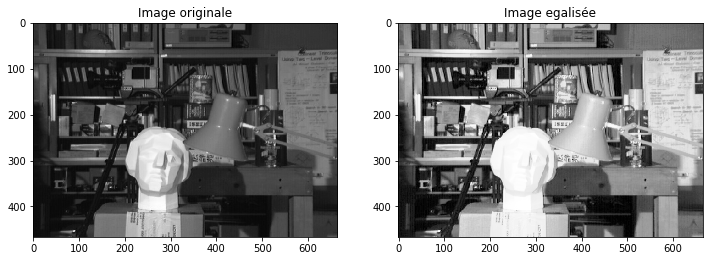

Ici, on remarque que le contraste de l'étagère (*background*) est améliorée, mais celui du mannequin (*foreground*) s'est détérioré.

In [0]:
import cv2
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

img = cv2.imread('img/tsukuba.jpg', 0)
equ = cv2.equalizeHist(img)

plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(img, "gray"), plt.title("Image originale")
plt.subplot(122), plt.imshow(equ, "gray"), plt.title("Image egalisée")
plt.show()

display(Markdown("Ici, on remarque que le contraste de l'étagère (*background*) " 
                 "est améliorée, mais celui du mannequin (*foreground*) s'est détérioré."))

**L'égalisation adaptative (AHE)** tente de remédier à ce problème découpant l'image en un **ensemble de sous-régions qui seront égalisées séparément**: on passe d'une égalisation globale à une **égalisation loacale** qui sera donc (potentiellement) plus respectueuse des variations locales de contraste dans l'image.

Cependant, l'AHE "simple" à tendance à amplifier le bruit dans les régions relativement homogènes de l'image (là où la majorité des pixels ont des valeurs de luminance similaires, entrainant un pic important sur l'histogramme).

**Contrast Limiting AHE (CLAHE)** est une extension de l'AHE qui permet de remédier à ce problème grâce au *clipping*.    
L'algorithme fonctionne de la manière suivante:
* Découpe l'image en une grille de `(n*n)` régions et calcule l'histogramme de chaque région.
* *Clipping:* si une ou des valeurs d'intensité sont trop représentées (fréquence > seuil), une partie des pixels ayant ces luminances sont redistribués uniformément (seront réaffectés une nouvelle valeur de luminance).
* L'histogramme (éventuellement tronqué) de chaque sous-région est égalisé.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5f/Clahe-redist.svg/600px-Clahe-redist.svg.png">

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

@interact
def clahe(image=[f for f in os.listdir("img/") if os.path.isfile(os.path.join("img/", f))], seuil_clip=(0, 1, 0.1), grid_size=(1,10,1)):
    img = cv2.imread('img/' + image, 0)

    clahe = cv2.createCLAHE(clipLimit=seuil_clip, tileGridSize=(grid_size,grid_size))
    img_clahe = clahe.apply(img)

    affichage2x2(img, img_clahe)

interactive(children=(Dropdown(description='image', options=('car.png', 'cells.png', 'chest.jpg', 'ct.png', 'l…

# <span style="color: green;text-decoration: underline" id="3">III. Opérations non-linéaires sur la luminance</span>
***

## <span style="color: DodgerBlue;text-decoration: underline">III.1 Transformée logarithmique</span>
***

La **transformation logarithmique** consiste à remplacer la luminance de chaque pixel par son logarithme. Elle permet d'ajuster les valeurs de luminance (et donc le contraste) de manière non-linéaire: les pixels sombres seront réhaussés bien plus que les pixels clairs. 

Cette transformation va donc transposer une gamme étroite d'intensités (faibles / sombres) de l'image d'entrée sur une gamme plus importante dans l'image de sortie, ce qui augmentera le contraste (et donc la quantité de détails visibles) spécifiquement dans les zones sombres.

\begin{equation*}
I'(x,y) = T(r) = c * log(1 + I(x,y))
\end{equation*}

Avec:
* $I(x,y)$ et $I'(x,y)$ la valeur de luminance d'un pixel d'entrée et de sortie, respectivement.
* $c$ une constante de mise à l'échelle, définie par: $c = \dfrac{255}{log(1 + I_\max)}$

La formule peut être résumée en :

\begin{equation*}
I'(x,y) = 255 * \dfrac{log(1 + I(x,y))}{log(1 + I_\max)}
\end{equation*}

In [5]:
### Code utile pour cette section

import os
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact

def affichage2x3(img1, img2, cs="gray"):
    fig = plt.figure(figsize=(20, 15))

    ax1 = plt.subplot(231)
    ax1.imshow(img1, cs)
    ax1.set_title("Image égalisée")
    ax2 = plt.subplot(232)
    ax2 = sns.kdeplot(np.array(img1).ravel(), shade=True, kernel="gau", bw="scott", clip=[0,255], cut=0)
    ax2.set_title("Histogramme (KDE) de égalisée")
    ax3 = plt.subplot(233)
    ax3.hist(np.array(img1).ravel(), bins=256, density=True, histtype='stepfilled', cumulative=True, color='tab:orange', alpha=0.5)
    ax3.set_title("CDF de l'image égalisée")
    
    ax4 = plt.subplot(234)
    ax4.imshow(img2, cs)
    ax4.set_title("Image log-transformée")
    ax5 = plt.subplot(235, sharey=ax2)
    ax5 = sns.kdeplot(np.array(img2).ravel(), shade=True, kernel="gau", bw="scott", clip=[1,254], cut=0)
    ax5.set_title("Histogramme (KDE) de l'image log-transformée")
    ax6 = plt.subplot(236)
    ax6.hist(np.array(img2).ravel(), bins=256, density=True, histtype='stepfilled', cumulative=True, color='tab:orange', alpha=0.5)
    ax6.set_title("CDF de l'image log transformée")
    plt.show()

In [6]:
@interact
def log_transform(image=[f for f in os.listdir("img/") if os.path.isfile(os.path.join("img/", f))]):
    img = cv2.imread('img/' + image, 0)
    img = cv2.equalizeHist(img)

    img_log = 255 * (np.log(img + 1)/(np.log(1 + np.max(img))))
    img_log = np.array(img_log, dtype="uint8")
    
    affichage2x3(img, img_log)

interactive(children=(Dropdown(description='image', options=('car.png', 'cells.png', 'chest.jpg', 'ct.png', 'l…

## <span style="color: DodgerBlue;text-decoration: underline">III.2 Transformée Gamma</span>
***

La **correction Gamma (ou *Power Law transform*)** consiste à remplacer la luminance de chaque pixel par une puissance (gamma) de sa valeur. Cette transformation, souvent appliquée nativement par les écrans (avec différentes valeurs de gamma), permet de mieux faire correspondre les variations de luminance du capteur (qui à capturé l'image) a notre perception.

*The reason we apply gamma correction is because our eyes perceive color and luminance differently than the sensors in a digital camera. When a sensor on a digital camera picks up twice the amount of photons, the signal is doubled. However, our eyes do not work like this. Instead, our eyes perceive "double the amount of light" as only a fraction brighter. Thus, while a digital camera has a linear relationship between brightness our eyes have a non-linear relationship. In order to account for this relationship we apply gamma correction.*

La correction gamma est décrite par l'équation suivante:

\begin{equation*}
I'(x,y) = T(r) = c * \left( \frac{I(x,y)}{c} \right)^\gamma
\end{equation*}

Avec:
* $I(x,y)$ et $I'(x,y)$ la valeur de luminance d'un pixel d'entrée et de sortie, respectivement.
* $c$ une constante de mise à l'échelle, généralement égale à 255.

On observera :
- `Gamma = 1` : image inchangée
- `Gamma < 1` : image assombrie
- `Gamma > 1` : image éclaircie

### <span style="color:crimson">**[Exercice]** A vous de jouer:</span>
***
<div style="color:DarkSlateBlue">  
 
1. **Implémentez le code de la correction gamma.**
    
    
2. **Rédigez un programme interactif qui permet de :**
    * Choisir une image avec un menu déroulant
    * Choisir la valeur du paramère $\gamma$ (de la correction éponyme) via un slider.
    * Affiche les résultats sous forme d'une grille 2x2: (Image log, Hist log + CDF) et (Image gamma, Hist gamma + CDF)
    * Afficher le tracé de l'équation de transformation appliquée (mise à jour selon la valeur de $\gamma$)


<u>Astuces</u>: vous pouvez utiliser la notation vectorielle pour faciliter votre code :
``` Python
x = np.linspace(0,255,100)
y = # TODO: Equation de la courbe
plt.plot(x, y)
```
    
3. **Modifiez votre code de sorte à ce qu'il soit appliquable à une image couleur.**
    
</div>

In [0]:
# > Emplacement exercice <



<div style="color:Navy"> 

***
# Fin du TP2
***
    
</div>